In [2]:
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np

### Обработка

In [3]:
df = pd.read_csv('r31iall.csv')
df.drop('Unnamed: 0', axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_12892\2822502351.py:1: DtypeWarning: Columns (358) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('r31iall.csv')


,idind,aaredid_i,aaid_i,aaid_h,zid_i,zid_h,yid_i,yid_h,xid_i,xid_h,...,aam97,aam98,aam99,aam100,aam101,aam109,aam111,wave,level,sample
0,7,55901,1000301.0,10003,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,56001,1000401.0,10004,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,56601,1002401.0,10024,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,57602,1004702.0,10047,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92,58201,1008401.0,10084,1008401.0,10084.0,1008401.0,10084.0,1008401.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,63106,664502,NaN,13860014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11975,63108,669503,NaN,14230185,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11976,63109,670002,NaN,14230816,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11977,63110,670102,NaN,14230817,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


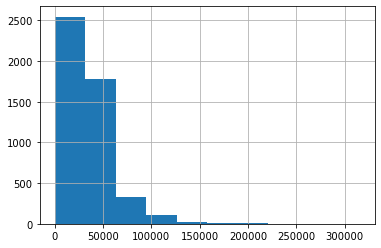

In [4]:
df.aaj10.hist();

In [45]:
# aaj72.171 У Вас есть дети, родные или официально усыновленные?

# aan4 Вы были когда-нибудь беременны, даже если эта беременность длилась всего несколько
# недель?

# aa_diplom ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА) - 31 ВОЛНА
# 1 окончил 0 - 6 классов
# 2 незаконченное среднее образование (7 - 8 кл)
# 3 незаконченное среднее образование (7 - 8 кл) + что-то
# еще
# 4 законченное среднее образование
# 5 законченное среднее специальное образование
# 6 законченное высшее образование и выше


# aa_marst СЕМЕЙНОЕ ПОЛОЖЕНИЕ - 31 ВОЛНА
# 1 Никогда в браке не состояли
# 2 Состоите в зарегистрированном браке
# 3 Живете вместе, но не зарегистрированы
# 4 Разведены и в браке не состоите
# 5 Bдовец (вдова)
# 6 ОФИЦИАЛЬНО

# status ТИП НАСЕЛЕННОГО ПУНКТА
# 1 Областной центр
# 2 Город
# 3 ПГТ
# 4 Село

# popul ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ

# aa_age Количество полных лет

In [5]:
df = df[['aah5', 'aaj72.171', 'aan4','aa_diplom', 'aa_age', 'aa_marst','status','popul','aaj10']].dropna().reset_index(drop=True)
len(df)

1966

In [6]:
# группировки
df.loc[df.aah5 == 1, 'aah5'] = 0 #муж
df.loc[df.aah5 == 2, 'aah5'] = 1 #женщ


df.loc[df['aaj72.171'] == 1, 'aaj72.171'] = 1 #есть дети
df.loc[df['aaj72.171'] == 2, 'aaj72.171'] = 0 #нету


df.loc[df['aan4'] == 1, 'aan4'] = 1 #была берем
df.loc[df['aan4'] == 2, 'aan4'] = 0 #нет

conditions =[
    (df['aa_diplom'] < 4) ,
    (df['aa_diplom'] >= 4) & (df['aa_diplom'] < 6),
    (df['aa_diplom'] == 6)
]
values = ['0', '1', '2']

df['diplom'] = np.select(conditions, values)
df = pd.get_dummies(df,columns=['diplom'])
df['diplom'] = np.select(conditions, values)

conditions =[
    (df['status'] < 3) ,
    (df['status'] >= 3)
]
values = ['0', '1']

df['city'] = np.select(conditions, values)
df = pd.get_dummies(df,columns=['city'])
df['city'] = np.select(conditions, values)

conditions =[
    (df['popul'] < 100000) ,
    (df['popul'] >= 100000 )
]
values = ['0', '1']

df['big_city'] = np.select(conditions, values)
df = pd.get_dummies(df,columns=['big_city'])
df['big_city'] = np.select(conditions, values)


df.loc[(df['aa_marst'] !=2 )& (df['aa_marst'] !=3) , 'aa_marst'] = 0 #не замуж
df.loc[(df['aa_marst'] ==2) | (df['aa_marst'] ==3) , 'aa_marst'] = 1 #замуж


In [48]:
df.columns

Index(['aah5', 'aaj72.171', 'aan4', 'aa_diplom', 'aa_age', 'aa_marst',
       'status', 'popul', 'aaj10', 'diplom_0', 'diplom_1', 'diplom_2',
       'diplom', 'city_0', 'city_1', 'city', 'big_city_0', 'big_city_1',
       'big_city'],
      dtype='object')

In [7]:
custom_column_names = ['пол', 'есть дети', 'была беременна когда-либо', 'aa_diplom', 'возраст', 'брак',
       'status', 'popul','ЗП', 'образование нет среднего', 'образование среднее', 'образование высшее', 'образование',
       'город', 'село', 'город или село', 'население менее 100к', 'население более 100к', 'население города']

In [8]:
# создания понятной даты
data = pd.DataFrame(df.values, columns=custom_column_names)
data

,пол,есть дети,была беременна когда-либо,aa_diplom,возраст,брак,status,popul,ЗП,образование нет среднего,образование среднее,образование высшее,образование,город,село,город или село,население менее 100к,население более 100к,население города
0,1,1.0,1.0,4.0,54.0,1.0,3,11900.0,12000.0,0,1,0,1,0,1,1,1,0,0
1,1,1.0,1.0,6.0,46.0,0.0,4,2800.0,105000.0,0,0,1,2,0,1,1,1,0,0
2,1,1.0,1.0,6.0,45.0,0.0,4,1700.0,24000.0,0,0,1,2,0,1,1,1,0,0
3,1,1.0,1.0,5.0,45.0,0.0,4,1700.0,25000.0,0,1,0,1,0,1,1,1,0,0
4,1,1.0,1.0,6.0,35.0,1.0,1,1099300.0,40000.0,0,0,1,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,1.0,1.0,4.0,31.0,1.0,3,3300.0,40000.0,0,1,0,1,0,1,1,1,0,0
1962,1,1.0,1.0,3.0,35.0,1.0,3,3300.0,18000.0,1,0,0,0,0,1,1,1,0,0
1963,1,0.0,1.0,6.0,47.0,0.0,1,12835600.0,60000.0,0,0,1,2,1,0,0,0,1,1
1964,1,0.0,1.0,5.0,47.0,0.0,1,12835600.0,60000.0,0,1,0,1,1,0,0,0,1,1


###  Графики

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression

In [23]:
color1 = '#7D4BDA'
color2 = '#ECCFB0'
color_text = 'Darkblue'

#### График 1

In [24]:
# fig = px.histogram(data, x="ЗП", color="образование высшее")
# fig.show();

fig = go.Figure()

fig.add_trace(
    go.Histogram(x=data[data['образование высшее']==True]['ЗП'],
                    name='Yes', marker_color=color1,
                    xbins=dict(size=5 * 10**3),
                    autobinx=False)
)

fig.add_trace(
    go.Histogram(x=data[data['образование высшее']==False]['ЗП'],
                    name='No', marker_color=color2,
                    xbins=dict(size=5 * 10**3),
                    autobinx=False)
)


fig.update_layout(title="Salary distribution of women with higher education and without ",
                    xaxis_title="Salary (rubles)",
                    yaxis_title="# women",
                    template='plotly_white',
                    barmode='overlay',
                    legend=dict(title='Higher<br>education',
                                font=dict(
                                    family="Arial",
                                    color=color_text,
                                    size=14)),
                    title_font_size=24,
                    font=dict(
                        family="Arial",
                        color=color_text),
                    bargap=0, # gap between bars of adjacent location coordinates
                    bargroupgap=0 # gap between bars of the same location coordinates
)

fig.update_traces(hoverinfo="all",
                    hovertemplate="Age: %{x}<br>Salary: %{y}",
                    opacity=.8,
                    )

fig.update_yaxes(#automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.update_xaxes(#automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.show();

#### График 2

In [25]:
Y_1 = data[data['образование высшее']==True]['ЗП']
Y_2 = data[data['образование высшее']==False]['ЗП']

X_1 = data[data['образование высшее']==True]['возраст']
X_2 = data[data['образование высшее']==False]['возраст']

# regression 1
reg_1 = LinearRegression().fit(np.vstack(X_1), Y_1)
pred_1 = reg_1.predict(np.vstack(sorted(set(X_1))))

# regression 1
reg_2 = LinearRegression().fit(np.vstack(X_2), Y_2)
pred_2 = reg_2.predict(np.vstack(sorted(set(X_2))))

In [26]:
# fig = px.scatter(x=data['возраст'], y=data['ЗП'],color = data['образование высшее'])
# fig = go.Figure()

fig = make_subplots(rows=1, cols=2, 
                    x_title='Age',
                    y_title='Salary (rubles)')
# график левый
fig.add_trace(
    go.Scatter(x=data[data['образование высшее']==True]['возраст'], name='Yes',
                y=data[data['образование высшее']==True]['ЗП'], mode='markers',
                marker=dict(color=color1, size=7), opacity=.5,
                legendgroup="group_left",  # this can be any string, not just "group"
                legendgrouptitle_text="Left chart"), 1, 1
)
fig.add_trace(
    go.Scatter(x=sorted(set(X_1)), name='OLS for "Yes"', 
                y=pred_1, mode='lines',
                marker=dict(color=color1), opacity=1,
                legendgroup="group_left",), 1, 1
)

# график правый
fig.add_trace(
    go.Scatter(x=data[data['образование высшее']==False]['возраст'], name='No',
                y=data[data['образование высшее']==False]['ЗП'], mode='markers',
                marker=dict(color=color2, size=7), opacity=.5,
                legendgroup="group_right",  # this can be any string, not just "group"
                legendgrouptitle_text="Right chart"), 1, 2
)
fig.add_trace(
    go.Scatter(x=sorted(set(X_2)), name='OLS for "No"', 
                y=pred_2, mode='lines',
                marker=dict(color=color2), opacity=1,
                legendgroup="group_right"), 1, 2
)

fig.update_layout(title="Women's salary with higher education and without by age",
                    template='plotly_white',
                    legend=dict(title='Higher<br>education',
                                groupclick="toggleitem",
                                font=dict(
                                    family="Arial",
                                    color=color_text,
                                    size=14)),
                    title_font_size=24,
                    font=dict(
                        family="Arial",
                        color=color_text)
)

fig.update_traces(hoverinfo="all",
                    hovertemplate="Age: %{x}<br>Salary: %{y}")

fig.update_yaxes(matches='y',
                #automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.update_xaxes(matches='x',
                #automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.show();

# ну в целом как будто ничего интересного, никакой заметной корреляции у зп с возрастом нет
# но видно, что почти все высокие зп у женщин с высшим образованием

# а еще у нас в датасете нет мужчин :(
# получается не очень репрезентативно, но ок

#### График 3

In [20]:
data['возраст_флаг'] = np.where(data['возраст'] >= 35, 1, 0) #типа принимаем 35 за какую-то условную границу самореализации и т.д.
#то есть если у женщины нет детей в этом возрасте, то это говорит о какой-то осознанности выбора

# fig = px.box(data, y="ЗП", x = 'есть дети', color = 'возраст_флаг')
# fig.show();

fig = make_subplots(rows=1, cols=2,
                    x_title='Presense of children',
                    y_title='Salary (rubles)',
                    subplot_titles=('Without', 'With'))

# левая часть (без детей)
fig.add_trace(
    go.Box(y=data[(data['возраст_флаг']==0) & (data['есть дети']==0)]['ЗП'],
            name='18-34', marker_color=color1), 1, 1
)
fig.add_trace(
    go.Box(y=data[(data['возраст_флаг']==1) & (data['есть дети']==0)]['ЗП'],
            name='35+', marker_color=color2), 1, 1
)

# правая часть (с детьми)
fig.add_trace(
    go.Box(y=data[(data['возраст_флаг']==0) & (data['есть дети']==1)]['ЗП'],
            name='18-34', marker_color=color1,
            showlegend=False), 1, 2
)
fig.add_trace(
    go.Box(y=data[(data['возраст_флаг']==1) & (data['есть дети']==1)]['ЗП'],
            name='35+', marker_color=color2,
            showlegend=False), 1, 2
)

fig.update_layout(title="Influence of children and age group on women's salary",
                    template='plotly_white',
                    legend=dict(title='Age',
                                font=dict(
                                    family="Arial",
                                    color=color_text,
                                    size=14)),
                    title_font_size=24,
                    font=dict(
                        family="Arial",
                        color=color_text)
)

fig.update_traces(hoverinfo="all",
                    hovertemplate="Age: %{x}<br>Salary: %{y}")

fig.update_yaxes(matches='y',
                #automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.update_xaxes(#automargin='left+top',
                ticks="outside", 
                tickwidth=1,
                tickcolor='grey', 
                tickfont=dict(family='Arial', color=color_text, size=14),
                title_font=dict(family='Arial', color=color_text, size=18)
)

fig.show()

#возраст_флаг
# 1 - больше 35
# 0 - меньше


#есть дети
# 1 - да
# 0 - нет


In [14]:
# data['ЗП'] = data['ЗП'].astype(float)
# data_grouped = data.groupby(['образование высшее', 'есть дети'], as_index = False).median()

# fig = px.bar(data_grouped, x='образование высшее', y='ЗП')
# fig.show();